# Intialize

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy_sz import Class
import os
import time




# the parameters needed for cosmology:
# use the last column of Planck 2018 (https://arxiv.org/pdf/1807.06209.pdf) Table 2
# TT,TE,EE+lowE+lensing+BAO
cosmo_params = {
'omega_b': 0.02242,
'omega_cdm':  0.11933,
'H0': 67.66, # use H0 because this is what is used by the emulators.
'tau_reio': 0.0561,
'ln10^{10}A_s': 3.047,
'n_s': 0.9665,

'k_pivot': 0.05,
'N_ncdm': 1,
'N_ur': 2.0328,
'm_ncdm': 0.06    

}

# # a simple conversion from cl's to dl's
# def l_to_dl(lp):
#     return lp*(lp+1.)/2./np.pi

Metal device set to: Apple M1 Pro


2023-03-19 00:08:21.381173: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-03-19 00:08:21.381579: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


# Compute matter powerspectrum

In [24]:
%%time 
M_halofit = Class()
M_halofit.set(cosmo_params)
M_halofit.set({
    'output': 'mPk',
    'non_linear':'halofit'
})
M_halofit.compute()

CPU times: user 4.38 s, sys: 15.3 ms, total: 4.4 s
Wall time: 790 ms


In [25]:
%%time 
M_hmcode = Class()
M_hmcode.set(cosmo_params)
M_hmcode.set({
    'output': 'mPk',
    'non_linear':'hmcode'
})
M_hmcode.compute()

CPU times: user 4.5 s, sys: 15.8 ms, total: 4.51 s
Wall time: 1.02 s


In [26]:
%%time 
M_fast = Class()
M_fast.set(cosmo_params)
M_fast.set({
    'output': 'mPk',
})
M_fast.compute_class_szfast()

CPU times: user 402 ms, sys: 160 ms, total: 561 ms
Wall time: 364 ms


In [42]:
z = 0.
print(M_fast.pk(1.,z))
z = 1.
print(M_fast.pk(1.,z))

829.9932891736055
160.15685321886585


In [33]:

k1_a = np.geomspace(1e-3,10.,500)
h = M.h()



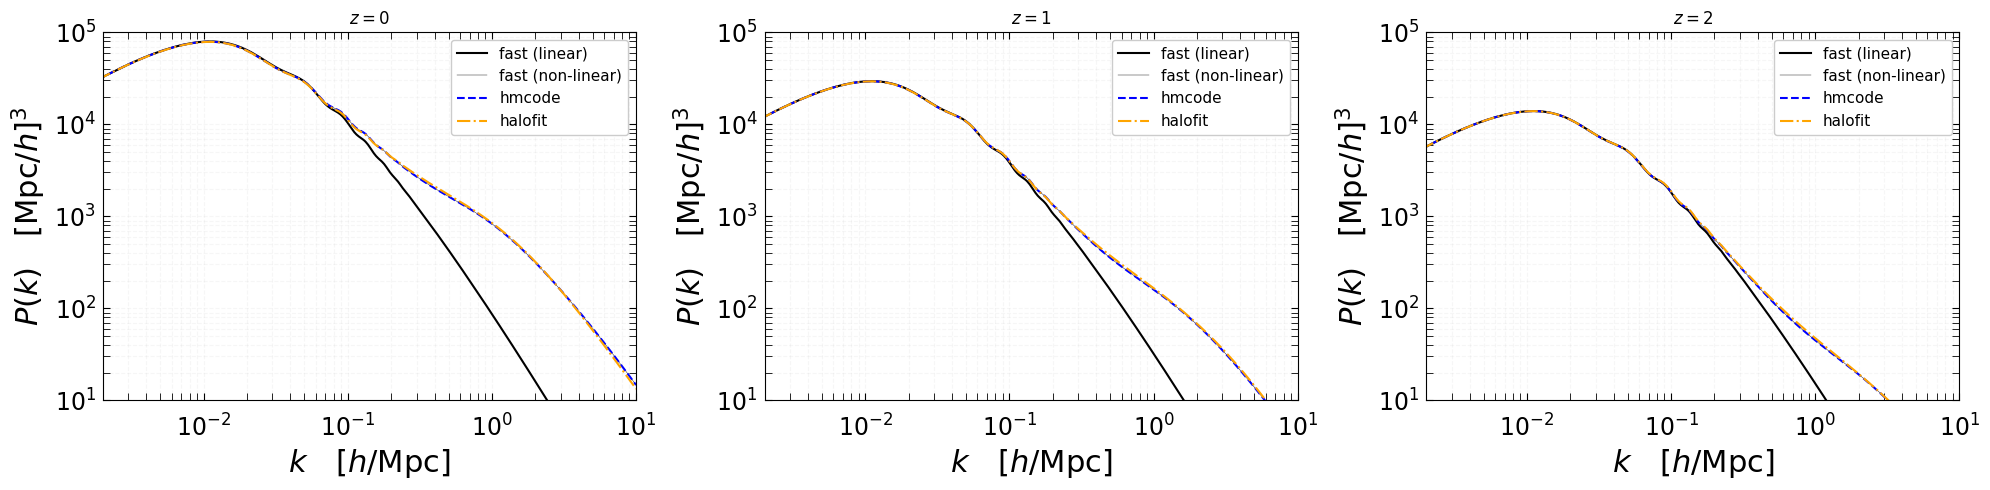

In [46]:

label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20,5))
ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( visible=True, which="both", alpha=0.1, linestyle='--')

ax.set_ylabel(r'$P(k)\quad\mathrm{[Mpc}/h]^3$',size=title_size)
ax.set_xlabel(r'$k\quad[h\mathrm{/Mpc]}$',size=title_size)

z = 0.
pk1_lin_fast = np.vectorize(M_fast.pk_lin)(k1_a,z)
pk1_nonlin_fast = np.vectorize(M_fast.pk)(k1_a,z)
pk1_nonlin_halofit = np.vectorize(M_halofit.pk)(k1_a,z)
pk1_nonlin_hmcode = np.vectorize(M_hmcode.pk)(k1_a,z)


ax.plot(k1_a,pk1_lin_fast,label=r'fast (linear)',alpha=1.,c='k')
ax.plot(k1_a,pk1_nonlin_fast,label=r'fast (non-linear)',alpha=1.,c='k',lw=0.3)
ax.plot(k1_a,pk1_nonlin_hmcode,label=r'hmcode',alpha=1.,c='b',ls='--')
ax.plot(k1_a,pk1_nonlin_halofit,label=r'halofit',alpha=1.,c='orange',ls='-.')
ax.loglog()

ax.set_ylim(1e1,1e5)
ax.set_xlim(2e-3,1e1)

ax.legend(loc=1,frameon=True,framealpha=1,fontsize=11)

ax.set_title(r'$z=0$')

ax = ax2
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( visible=True, which="both", alpha=0.1, linestyle='--')

ax.set_ylabel(r'$P(k)\quad\mathrm{[Mpc}/h]^3$',size=title_size)
ax.set_xlabel(r'$k\quad[h\mathrm{/Mpc]}$',size=title_size)

z = 1.
pk1_lin_fast = np.vectorize(M_fast.pk_lin)(k1_a,z)
pk1_nonlin_fast = np.vectorize(M_fast.pk)(k1_a,z)
pk1_nonlin_halofit = np.vectorize(M_halofit.pk)(k1_a,z)
pk1_nonlin_hmcode = np.vectorize(M_hmcode.pk)(k1_a,z)


ax.plot(k1_a,pk1_lin_fast,label=r'fast (linear)',alpha=1.,c='k')
ax.plot(k1_a,pk1_nonlin_fast,label=r'fast (non-linear)',alpha=1.,c='k',lw=0.3)
ax.plot(k1_a,pk1_nonlin_hmcode,label=r'hmcode',alpha=1.,c='b',ls='--')
ax.plot(k1_a,pk1_nonlin_halofit,label=r'halofit',alpha=1.,c='orange',ls='-.')
ax.loglog()

ax.set_ylim(1e1,1e5)
ax.set_xlim(2e-3,1e1)

ax.legend(loc=1,frameon=True,framealpha=1,fontsize=11)

ax.set_title(r'$z=1$')

ax = ax3
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( visible=True, which="both", alpha=0.1, linestyle='--')

ax.set_ylabel(r'$P(k)\quad\mathrm{[Mpc}/h]^3$',size=title_size)
ax.set_xlabel(r'$k\quad[h\mathrm{/Mpc]}$',size=title_size)

z = 2.
pk1_lin_fast = np.vectorize(M_fast.pk_lin)(k1_a,z)
pk1_nonlin_fast = np.vectorize(M_fast.pk)(k1_a,z)
pk1_nonlin_halofit = np.vectorize(M_halofit.pk)(k1_a,z)
pk1_nonlin_hmcode = np.vectorize(M_hmcode.pk)(k1_a,z)


ax.plot(k1_a,pk1_lin_fast,label=r'fast (linear)',alpha=1.,c='k')
ax.plot(k1_a,pk1_nonlin_fast,label=r'fast (non-linear)',alpha=1.,c='k',lw=0.3)
ax.plot(k1_a,pk1_nonlin_hmcode,label=r'hmcode',alpha=1.,c='b',ls='--')
ax.plot(k1_a,pk1_nonlin_halofit,label=r'halofit',alpha=1.,c='orange',ls='-.')
ax.loglog()

ax.set_ylim(1e1,1e5)
ax.set_xlim(2e-3,1e1)

ax.legend(loc=1,frameon=True,framealpha=1,fontsize=11)

ax.set_title(r'$z=2$')




fig.tight_layout()
plt.savefig('figures/pkz.pdf')